<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import datetime

print(f" TF version : {tf.__version__}")
print(f" Last known execution of the notebook : {datetime.datetime.now()}")

 TF version : 2.12.0
 Last known execution of the notebook : 2023-06-27 23:11:06.656385


Steps in modelling with Tensorflow
1. **Creating a model**: Piece together the layers of a neural network yourself or import a previously built model (known as Transfer Learning ).
2. **Compiling a model** : defining how a models performance should be measured( loss/metrics) as well as defining how it can be improved(optimizer).
3. **Fitting a model** : letting the model try to find patterns in the data.

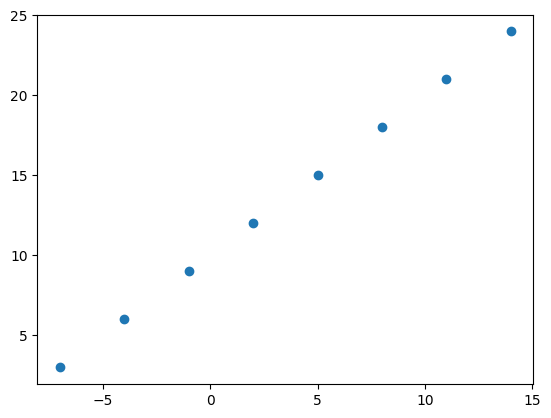

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features ( using tensors )
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels ( using tensors)
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. creating the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2. Compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer = tf.keras.optimizers.SGD()
              ,metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 860ms/step - loss: 7.5806 - mae: 7.5806
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4756 - mae: 7.4756


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 418ms/step


array([[29.38635]], dtype=float32)

Steps to improving the model
1. _Creating a model_ : Here we might want to add more layers, increase the number of hidden units, change the activation function in each layer.
2. _Compiling a model_: We might want to choose a different optimizer or change the **learning rate** of the optimization function
3. _Fitting a model_ : we could also try fit the model for more **epochs**

_There are many different ways to improve a neural network. Some of the most common include : increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are human-changeable, they are referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter-tuning_

In [ ]:
# Lets try to improve our model by training it a little longer
# set seeds
tf.random.set_seed(42)

#1.Create the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
model.compile (loss= tf.keras.losses.mae
               ,optimizer = tf.keras.optimizers.SGD()
               ,metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.7679 - mae: 15.7679
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 15.4866 - mae: 15.4866
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 15.2054 - mae: 15.2054
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 14.9382 - mae: 14.9382
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 14.8057 - mae: 14.8057
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 14.6732 - mae: 14.6732
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 14.5407 - mae: 14.5407
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 14.4082 - mae: 14.4082
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 14.2757 - mae: 14.2757
Epoch 10/100
1/1 [==============================] - 0s 51ms/step - loss: 14.1432 - mae: 14.1432
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[29.505297]], dtype=float32)

A typical workflow that we will have to go through while building neural networks is
`build model -> evaluate it -> build (tweak) model -> evaluate it -> build (tweak) model -> evaluate it...`

## Visualize Visuzalize Visualize

1. **The data**
2. **The Model**
3. **The training of the Model**
4. **The prediction of the Model**

In [ ]:
# Make a bigger dataset
X = np.arange(-100,100,4)
y = np.arange(-90,110,4)


Split the data into Training , Validation , Test set

In [ ]:
#Split the dataset into Training, Validation and Test
len(X)

50

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

Visualize the train and test data

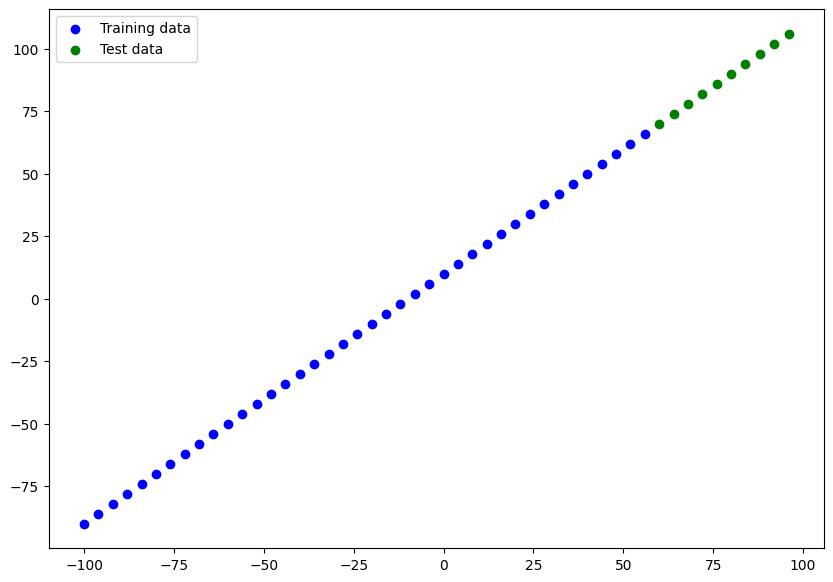

In [ ]:
plt.figure(figsize=(10,7))
#plot the training data
plt.scatter(X_train,y_train,c='b',label='Training data')
#plot the test data
plt.scatter(X_test,y_test,c='g',label='Test data')
#show legend
plt.legend();

In [ ]:
#Train the model , exactly same as earlier

#set seed
tf.random.set_seed(42)

# create model
#input_shape should be equal to X_train.ndim
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
]
)
# compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 29ms/step - loss: 55.5275 - mae: 55.5275
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 21.3164 - mae: 21.3164
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 9.7119 - mae: 9.7119
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8546 - mae: 11.8546
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 10.9205 - mae: 10.9205
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 10.0945 - mae: 10.0945
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 9.1272 - mae: 9.1272
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1118 - mae: 9.1118
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 15.0894 - mae: 15.0894
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5889 - mae: 7.5889
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

Visualizing the model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


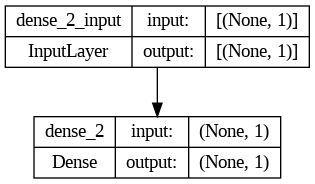

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 143ms/step


array([[44.377365],
       [47.24994 ],
       [50.122513],
       [52.995087],
       [55.86766 ],
       [58.740234],
       [61.612812],
       [64.48538 ],
       [67.357956],
       [70.23054 ]], dtype=float32)

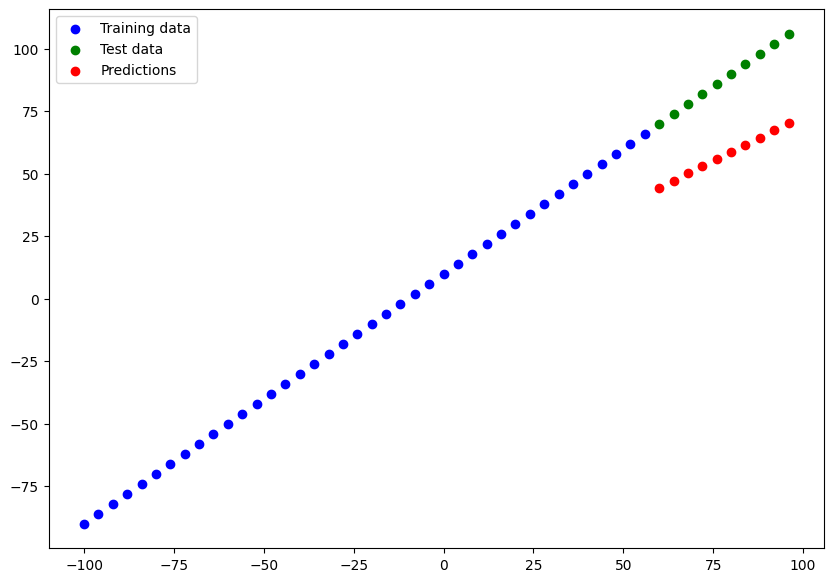

In [ ]:
# Function to plot predictions
def plot_predictions(train_data=X_train
                     ,train_label=y_train
                     ,test_data=X_test
                     ,test_label=y_test
                     ,predictions=y_preds):

  plt.figure(figsize=(10,7))

  #Plot the training data
  plt.scatter(train_data,train_label,c='b',label="Training data")
  #Plot the test data
  plt.scatter(test_data,test_label,c='g',label="Test data")
  #Plot the training data
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  #Show legend
  plt.legend();

plot_predictions()

## Evaluate Predictions
Two main metrics for regression problems
1. MAE (Mean Absolute Error) : the mean difference between each of the predictions.
2. MSE (Mean Squared Error) : the squared mean difference between the predictions.

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 369ms/step - loss: 30.6961 - mae: 30.6961


[30.6960506439209, 30.6960506439209]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.622635, 40.75006 , 37.877487, 35.004913, 32.13234 , 29.259766,
       26.387188, 23.514618, 20.642044, 17.81557 ], dtype=float32)>

Since the shape of y_preds & y_test are different, the `tf.metrics.mean_absolute_error` responded with an array, where as we expect a single value


In [ ]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [ ]:
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.69605>

In [ ]:
mse = tf.metrics.mean_squared_error(y_true=y_test
                                    ,y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=952.7341>

## Running Experiments to improve the model
1. model_1 : Same model architecture trained for 100 epochs
2. model_2 : 2 layers trained for 100 epochs
3. model_1 : 2 layers trained for 500 epochs

In [ ]:
#model_1
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae
                ,optimizer=tf.keras.optimizers.SGD()
                ,metrics=['mae'])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 40ms/step - loss: 17.1901 - mae: 17.1901
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 12.3770 - mae: 12.3770
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 11.7007 - mae: 11.7007
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 9.3216 - mae: 9.3216
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 10.1944 - mae: 10.1944
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 9.4532 - mae: 9.4532
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 8.5890 - mae: 8.5890
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 9.0418 - mae: 9.0418
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 18.8058 - mae: 18.8058
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1414 - mae: 10.1414
Epoch 11/100
2/2 [==============================] - 0s 9ms

1/1 [==============================] - 0s 124ms/step


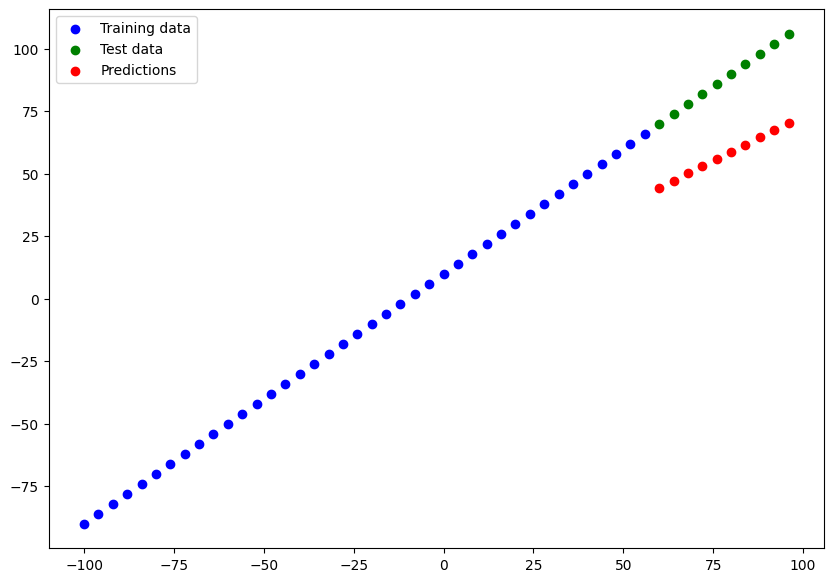

In [ ]:
# predict and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
y_preds_1

array([[44.404755],
       [47.277657],
       [50.15056 ],
       [53.023457],
       [55.89636 ],
       [58.769257],
       [61.64216 ],
       [64.51506 ],
       [67.38796 ],
       [70.260864]], dtype=float32)

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_test,y_preds_1.squeeze()).numpy()
mse_1 = tf.metrics.mean_squared_error(y_test,y_preds_1.squeeze()).numpy()
mae_1,mse_1

(30.66719, 950.95703)

In [ ]:
#model_2
#Set seed
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

#Compile model
model_2.compile(loss=tf.keras.losses.mae
                ,optimizer=tf.keras.optimizers.SGD()
                ,metrics=['mae'])

#train the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 187ms/step


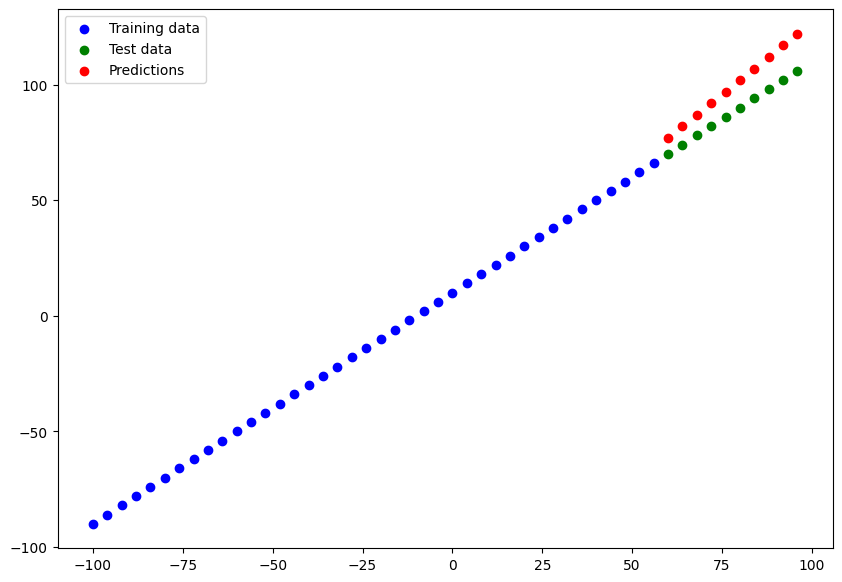

In [ ]:
#model_2 predictions and plot_prediction
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
y_preds_2

array([[ 76.87652 ],
       [ 81.8893  ],
       [ 86.902084],
       [ 91.91487 ],
       [ 96.927666],
       [101.94045 ],
       [106.95324 ],
       [111.96603 ],
       [116.97881 ],
       [121.9916  ]], dtype=float32)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_test,y_preds_2.squeeze()).numpy()
mse_2 = tf.metrics.mean_squared_error(y_test,y_preds_2.squeeze()).numpy()
mae_2, mse_2

(11.434057, 139.2)

In [ ]:
#model_3
#set seed
tf.random.set_seed(42)

#create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

#Compile model
model_3.compile(loss=tf.keras.losses.mae
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=['mae'])

# train the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 77ms/step


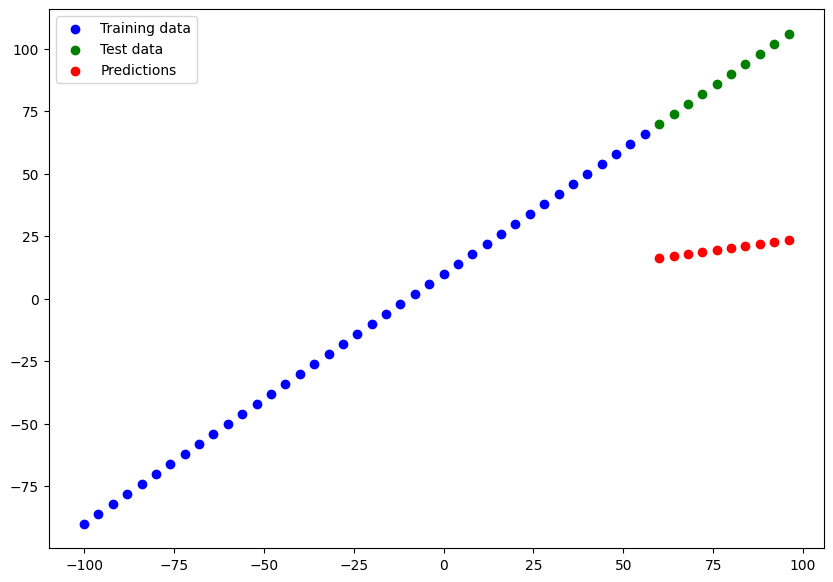

In [ ]:
#predict and plot predictions
y_preds_3= model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_test,y_preds_3.squeeze()).numpy()
mse_3 = tf.metrics.mean_squared_error(y_test,y_preds_3.squeeze()).numpy()
mae_3,mse_3

(68.01282, 4710.271)

In [ ]:
y_preds_3

array([[16.391203],
       [17.19031 ],
       [17.989414],
       [18.788519],
       [19.587627],
       [20.386732],
       [21.185837],
       [21.984945],
       [22.78405 ],
       [23.583155]], dtype=float32)

In [ ]:
model_results = [
    ["model_1",mae_1,mse_1]
    ,["model_2",mae_2,mse_2]
    ,["model_3",mae_3,mse_3]
]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.667191,950.957031
1,model_2,11.434057,139.199997
2,model_3,68.012817,4710.270996


Save the model
1. `HDF5` format
2. `SavedModelFormat` format


In [ ]:
model_2.save("best_model_savedmodelformat")

In [ ]:
!ls best_model_savedmodelformat

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:
model_2.save("best_model_hdf5format.h5")

In [ ]:
!ls best_model_hdf5format.h5

best_model_hdf5format.h5


Load the model

In [ ]:
loaded_saved_model = tf.keras.models.load_model("best_model_savedmodelformat")
loaded_saved_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
saved_model_preds = loaded_saved_model.predict(X_test)
mae_2== tf.metrics.mean_absolute_error(y_test,saved_model_preds.squeeze()).numpy()

1/1 [==============================] - 0s 61ms/step


True

In [ ]:
loaded_hd5_model = tf.keras.models.load_model("best_model_hdf5format.h5")
h5_preds = loaded_hd5_model.predict(X_test)
mae_2 == tf.metrics.mean_absolute_error(y_test,h5_preds.squeeze()).numpy()

1/1 [==============================] - 0s 59ms/step


True

## A larger example
We will use the publicly available dataset [Medical Cost Dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on Github](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In [ ]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Turn all the categorical columns to numericals using `pd.get_dummies()`

In [ ]:
#Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Split the data into features (X) and labels(y)

In [ ]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
X.count(),y.count()

(age                 1338
 bmi                 1338
 children            1338
 sex_female          1338
 sex_male            1338
 smoker_no           1338
 smoker_yes          1338
 region_northeast    1338
 region_northwest    1338
 region_southeast    1338
 region_southwest    1338
 dtype: int64,
 1338)

Create the train and test split using sklearn's `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,test_size=0.2
                                                    ,random_state=42)

len(X_train), len(y_train), len(X_test),len(y_test)

(1070, 1070, 268, 268)

Now we can build and fit the model

In [ ]:
# Set seed
tf.random.set_seed(42)

# Build the model
insurance_model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
    ,tf.keras.layers.Dense(1)
])

# Compile the model with loss and optimizers
insurance_model.compile(loss=tf.keras.losses.mae
                        ,optimizer=tf.keras.optimizers.SGD()
                        ,metrics=['mae'])

# fit the model
insurance_model.fit(X_train,y_train,epochs=5)

Epoch 1/5
34/34 [==============================] - 1s 3ms/step - loss: 9396.4434 - mae: 9396.4434
Epoch 2/5
34/34 [==============================] - 0s 2ms/step - loss: 7870.6719 - mae: 7870.6719
Epoch 3/5
34/34 [==============================] - 0s 2ms/step - loss: 7587.6553 - mae: 7587.6553
Epoch 4/5
34/34 [==============================] - 0s 2ms/step - loss: 7530.9707 - mae: 7530.9707
Epoch 5/5
34/34 [==============================] - 0s 2ms/step - loss: 7700.5742 - mae: 7700.5742


Try with a bigger model
1. Increase the number of layers from 2 to 3
2. Increase the number of hidden units except the last layer, as the output shape expected is 1D array
4. Change the optimizer from SGD to Adam
3. Train the model longer.

In [68]:
#set seed
tf.random.set_seed(42)

# build the model
insurance_model_v2= tf.keras.Sequential([
     tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# Compile the model with loss function and optimizers
insurance_model_v2.compile(loss=tf.keras.losses.mae
                           ,optimizer=tf.keras.optimizers.Adam()
                           ,metrics=['mae'])

# Train the model for 100 epochs and save the history( used later to plot the loss curve)
history = insurance_model_v2.fit(X_train, y_train,epochs=100,verbose=0)

In [69]:
# Evaluate the model
insurance_model_v2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4822.6621 - mae: 4822.6621


[4822.662109375, 4822.662109375]

In [70]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7424.5161 - mae: 7424.5161


[7424.51611328125, 7424.51611328125]

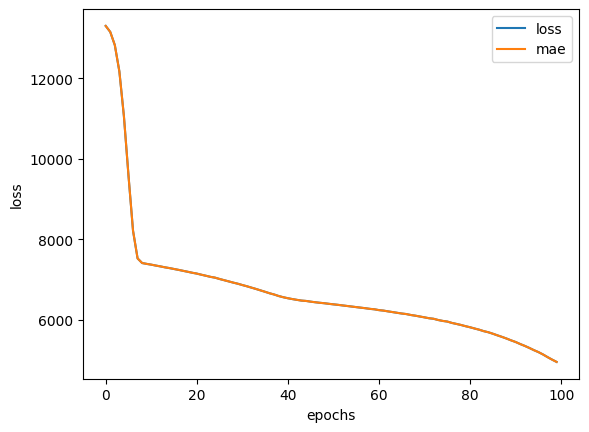

In [72]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Preprocessing Data
A common practice when working with neural networks is to make sure all the data we pass to them is in range 0 and 1.

This practice is called **normalization**

There is another practice called **standardization** which converts all our data to unit variance and 0 mean


Lets try re-training the model after applying **normatlization** and **standardization** to our data.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [74]:
## Read the insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [75]:
#check the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We will use few classes from Scikit-learn to
1. convert the categorical columns to numerical columns
2. Normalize the data so that all the column values are in the range 0 to 1

For the above requirements, we will use `make_column_transformer` to build a multi-step data preprocessing function.

* `MinMaxScaler`: ensures all the columns are normalized
* `OneHotEncoder`: ensures all the categorical columns are converted to numerical values



In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"])
    ,(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

#Create X & y
X = insurance.drop(["charges"],axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,y
                                                    ,test_size=0.2
                                                    ,random_state=42)

#Fit the column transformer on the training data only
ct.fit(X_train)

#Transform the training data and test data with column transformer
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [78]:
# Lets look at the data before and after normalization
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [80]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [81]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [89]:
# Model with normalized data

# set seed
tf.random.set_seed(42)

# build model
insurance_model_v3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100)
    ,tf.keras.layers.Dense(10)
    ,tf.keras.layers.Dense(1)
])

# compile the model

insurance_model_v3.compile(loss=tf.keras.losses.mae
                           ,optimizer=tf.keras.optimizers.Adam()
                           ,metrics=["mae"]
                           )

# Train the model with normalized data

history_2 = insurance_model_v3.fit(X_train_normal,y_train,epochs=300, verbose=0)


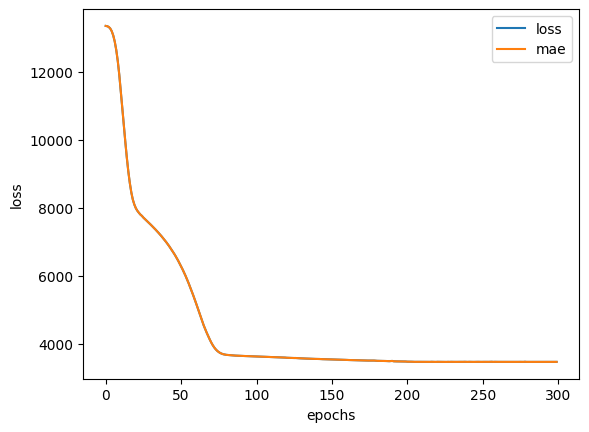

In [90]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss");

In [91]:
v3_loss, v3_mae = insurance_model_v3.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.0774 - mae: 3161.0774


In [92]:
v3_loss, v3_mae

(3161.077392578125, 3161.077392578125)